## Attendance Recording for Probability Theory and Mathematical Statistics, Spring 2024 📚

This Python script assists in recording attendance for the course **Probability Theory and Mathematical Statistics**. The class takes place in the Spring semester of 2024. The following process is used to ensure a fair and unbiased selection of students for attendance:

**Course Name**: Probability Theory and Mathematical Statistics

**Teaching Assistant**: Liyuan Shang

**Date**: 2024.03.12

---

### What is True Randomness? 🎲

**True randomness** refers to the unpredictability and lack of pattern in a sequence of numbers or events. True random numbers are generated through natural, physical processes that are inherently unpredictable, such as atmospheric noise, radioactive decay, or thermal noise.

### What is Pseudo-Randomness? 💻

**Pseudo-randomness**, on the other hand, involves sequences of numbers that appear random but are generated by a deterministic computational process. These numbers are produced by algorithms and, while they can seem random, they are ultimately predictable if one knows the algorithm and its initial state (seed).

### Why Use True Randomness? 🤔

True random numbers are crucial for applications where unpredictability is essential, such as in cryptography, secure key generation, and gambling. In these domains, the security and fairness of the processes rely on the inability to predict future values. Pseudo-random numbers, being inherently predictable to some extent, can be vulnerable to reverse engineering and other forms of attack.

RANDOM.ORG ([link](https://www.random.org)) generates true random numbers using atmospheric noise, which is a process too complex to be predicted. This ensures the randomness needed for applications requiring high levels of security and unpredictability.

---

## function for random numbers

In [1]:
import pandas as pd
import requests
from tqdm import tqdm
import matplotlib.pyplot as plt

def fetch_random_numbers(num=100, minimum=0, maximum=38):
    """
    Fetches a list of true random numbers from RANDOM.ORG.

    Parameters:
    num (int): The number of random numbers to fetch.
    minimum (int): The minimum value of the random numbers.
    maximum (int): The maximum value of the random numbers.

    Returns:
    list: A list of true random integers between `minimum` and `maximum`.
    """
    url = f"https://www.random.org/integers/?num={num}&min={minimum}&max={maximum}&col=1&base=10&format=plain&rnd=new"
    response = requests.get(url)
    if response.status_code == 200:
        numbers = [int(x) for x in response.text.strip().split()]
        return numbers
    else:
        raise Exception("Failed to get random numbers from RANDOM.ORG")

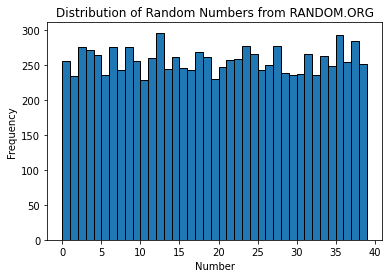

In [5]:
# Fetch a sample of random numbers
random_numbers = fetch_random_numbers(num=10000, minimum=0, maximum=38)

# Plot the distribution of the fetched random numbers
plt.hist(random_numbers, bins=range(min(random_numbers), max(random_numbers)+2), 
         edgecolor='black')
plt.title('Distribution of Random Numbers from RANDOM.ORG')
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.show()

The histogram above displays the frequency distribution of numbers obtained from RANDOM.ORG. We fetched 10,000 numbers within the range of 0 to 38, expecting a **uniform distribution** due to the true randomness provided by atmospheric noise.👍

## function for select students

In [16]:
# Function to randomly select n students from the student list
def select_random_students(student_info, n=1):
    """
    Selects `n` unique random students from the student information DataFrame.

    Parameters:
    student_info (DataFrame): The DataFrame containing the student information.
    n (int): The number of students to randomly select.

    Returns:
    DataFrame: A DataFrame containing the randomly selected students.
    """

    selected_indices = set()  # Use a set to store unique indices
    total_students = len(student_info) - 1

    # Continue fetching random numbers until we have n unique indices
    while len(selected_indices) < n:
        random_index = fetch_random_numbers(num=1, minimum=0, maximum=total_students)[0]
        selected_indices.add(random_index)

    # Select the students based on the randomly chosen indices
    selected_students = student_info.iloc[list(selected_indices)]

    return selected_students


# Function to records the attendance for the selected students
def record_attendance(selected_students, filename):
    """
    Records the attendance for the selected students and saves it to a file.

    Parameters:
    selected_students (DataFrame): The DataFrame containing the selected students.
    filename (str): The filename where the attendance record will be saved.
    """
    # Add a new column for attendance status with default value 'Absent'
    selected_students['Attendance'] = 'Absent'
    
    # Loop through the selected students and ask for attendance
    for index, row in selected_students.iterrows():
        # Prompt for attendance
        response = input(f"Is {row['name']} (ID: {row['student id']}) present? (y/n): ").strip().lower()
        # Record the attendance
        selected_students.at[index, 'Attendance'] = 'Present' if response == 'y' else 'Absent'

    # Save the attendance record to a new CSV file
    selected_students.to_csv(filename, index=False)
    print(f"Attendance recorded and saved to {filename}")

## students information

In [2]:
filename = 'student_info.csv'  # Path to your CSV file
student_info = pd.read_csv(filename, encoding='gbk')
student_info

,student id,name,gender,grade
0,1,Sam,女,2020
1,2,Tom,男,2020
2,3,Amy,男,2023
3,4,Mike,女,2021
4,5,John,女,2023
5,6,White,女,2022
6,7,Black,女,2023
7,8,Sora,男,2023
8,9,Ken,男,2023
9,10,Jimmy,男,2023


## 📌Roll call 2024.03.13

In [ ]:
number_of_students = 3  # Number of students to select
selected_students = select_random_students(student_info, number_of_students)
print(selected_students)

In [ ]:
# Call the function to record attendance and save it
attendance_filename = 'attendance_record_20240313.csv'  # Name the attendance record file
record_attendance(selected_students, attendance_filename)

## 📌Roll call 2024.03.15

In [ ]:
number_of_students = 3  # Number of students to select
selected_students = select_random_students(student_info, number_of_students)
print(selected_students)

In [ ]:
# Call the function to record attendance and save it
attendance_filename = 'attendance_record_20240315.csv'  # Name the attendance record file
record_attendance(selected_students, attendance_filename)